In [1]:
import tensorflow as tf
import keras
import cv2
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os, sys
os.listdir()

['tomatoe_onions_real_time_classification.ipynb',
 'README.md',
 'Object_detection_tomatoe_onion_claassification.py',
 'models',
 'tomatoe_onions',
 '.git',
 'pure_model.h5',
 '.ipynb_checkpoints']

# Image processing

In [3]:
base_dir = os.getcwd()

In [11]:
from os import listdir
from os.path import isfile, join
mypath = 'tomatoe_onions/train/others/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [12]:
onlyfiles[:3]

['IMG_20200715_223142_584.jpg',
 'IMG_20200715_222817_917.jpg',
 'IMG_20200715_222757_779.jpg']

In [19]:
train_dir = 'tomatoe_onions/train'
test_dir = 'tomatoe_onions/test'

default_dir = 'tomatoe_onions'
train_onion, train_tomatoe, train_others, test_onion, test_tomatoe, test_others = [], [],[],[],[],[]
def get_data():
    current_dir = train_dir+'/tomatoes/'
    train_tomatoe = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    #print(train_tomatoe)
    
    current_dir = train_dir +'/onions/'
    train_onion = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    current_dir = train_dir +'/others/'
    train_others = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    current_dir = test_dir+'/tomatoes/'
    test_tomatoe = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    current_dir = test_dir +'/onions/'
    test_onion = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    
    current_dir = test_dir +'/others/'
    test_others = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
    return train_tomatoe, train_onion, test_tomatoe, test_onion, train_others, test_others

train_tomatoe, train_onion, test_tomatoe, test_onion, train_others, test_others = get_data()



In [20]:
len(train_tomatoe),len(train_onion),len(test_tomatoe),len(test_onion), len(train_others), len(test_others)

(37, 47, 10, 10, 28, 6)

In [21]:

os.getcwd()

'/home/odemakinde/Desktop/Computer-Vision-master/Computer-Vision/tomatoe_onions real time image classification'

In [22]:
os.listdir()

['tomatoe_onions_real_time_classification.ipynb',
 'README.md',
 'Object_detection_tomatoe_onion_claassification.py',
 'models',
 'tomatoe_onions',
 '.git',
 'pure_model.h5',
 '.ipynb_checkpoints']

In [23]:
import numpy as np
np.random.seed(100)

import keras
from keras.preprocessing import image

train_images, train_target = [], []
for i in train_tomatoe:
    try:
        directory = train_dir + '/tomatoes/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(0)
    except OSError as err:
        continue

for i in train_onion:
    try:
        directory = train_dir + '/onions/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:

        continue
        
for i in train_others:
    try:
        directory = train_dir + '/others/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(2)
    
    except OSError as err:

        continue
        
for i in test_tomatoe:
    try:
        directory = test_dir + '/tomatoes/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(0)
    except OSError as err:
        continue

for i in test_onion:
    try:
        directory = test_dir + '/onions/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:
        pass

for i in test_others:
    try:
        directory = test_dir + '/others/' + str(i)
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        train_target.append(1)
    
    except OSError as err:
        pass

In [24]:
#image.load_img??

In [25]:
train_images = np.array(train_images)
train_target = np.array(train_target)
train_images.shape, train_target.shape

((138, 224, 224, 3), (138,))

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_target, train_size = 0.7, random_state = 42, stratify = train_target)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((96, 224, 224, 3), (42, 224, 224, 3), (96,), (42,))

In [27]:
y_train

array([2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0])

In [28]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Training the network without transfer learning


In [29]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 8)       1032      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 24200)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2420100   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [31]:
epochs = 5

history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test) ,batch_size=10)

Epoch 1/10
10/10 [==============================] - 2s 188ms/step - loss: 0.9609 - accuracy: 0.5521 - val_loss: 0.6842 - val_accuracy: 0.5952
Epoch 2/10
10/10 [==============================] - 2s 171ms/step - loss: 0.3951 - accuracy: 0.8750 - val_loss: 0.5016 - val_accuracy: 0.8095
Epoch 3/10
10/10 [==============================] - 2s 173ms/step - loss: 0.1686 - accuracy: 0.9271 - val_loss: 0.4764 - val_accuracy: 0.8333
Epoch 4/10
10/10 [==============================] - 2s 171ms/step - loss: 0.1113 - accuracy: 0.9479 - val_loss: 0.2562 - val_accuracy: 0.9048
Epoch 5/10
10/10 [==============================] - 2s 171ms/step - loss: 0.0545 - accuracy: 0.9792 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 6/10
10/10 [==============================] - 2s 171ms/step - loss: 0.0458 - accuracy: 0.9896 - val_loss: 0.3732 - val_accuracy: 0.8571
Epoch 7/10
10/10 [==============================] - 2s 174ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 0.8810
Epoch 

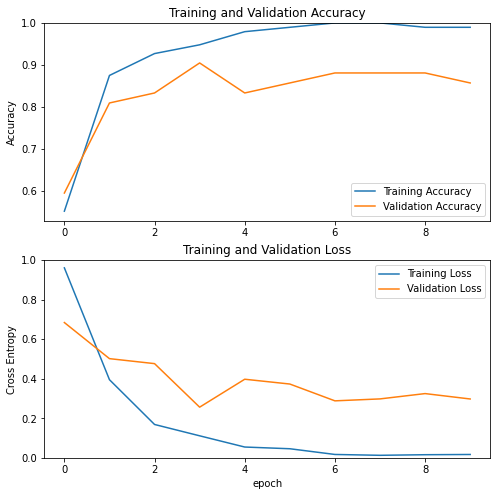

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [33]:
#model.save('pure_model.h5')

# using tensorflow API

In [34]:
import os
os.getcwd()

'/home/odemakinde/Desktop/Computer-Vision-master/Computer-Vision/tomatoe_onions real time image classification'

In [35]:
os.chdir('/home/odemakinde/Desktop/Computer-Vision-master/Computer-Vision/tomatoe_onions real time image classification/models/research/object_detection/')

In [36]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
import gi
gi.require_version('Gtk', '3.0')

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util


# Test model

In [37]:
import tensorflow_hub as hub
os.getcwd()

'/home/odemakinde/Desktop/Computer-Vision-master/Computer-Vision/tomatoe_onions real time image classification/models/research/object_detection'

In [43]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 8)       1032      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               2420100   
_________________________________________________________________
dense_7 (Dense)              (None, 50)               

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [45]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "./ssd_inception_v2_coco_2017_11_17/model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


checkpoint_path_update = "./ssd_inception_v2_coco_2017_11_17/update/model.ckpt"
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_update, 
    verbose=1, 
    save_weights_only=True)


In [46]:
os.getcwd()

'/home/odemakinde/Desktop/Computer-Vision-master/Computer-Vision/tomatoe_onions real time image classification/models/research/object_detection'

In [47]:
epochs = 5

# Save the weights using the `checkpoint_path_update` format
model.save_weights(checkpoint_path_update.format(epoch=0))

history = model.fit(x_train, y_train, epochs=10, callbacks=[cp_callback],
                    validation_data = (x_test, y_test) ,batch_size=10, verbose = 0)


Epoch 00001: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00002: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00003: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00004: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00005: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00006: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00007: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00008: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00009: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt

Epoch 00010: saving model to ./ssd_inception_v2_coco_2017_11_17/update/model.ckpt


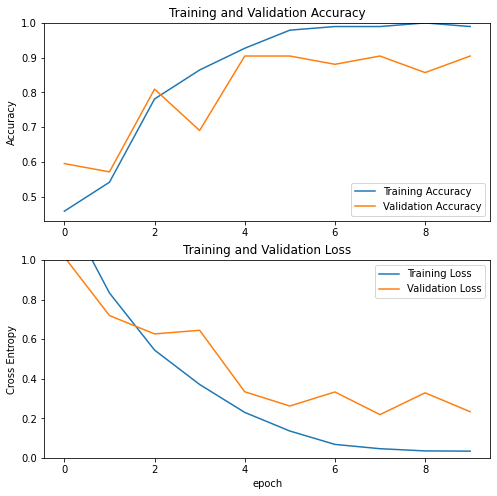

In [53]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

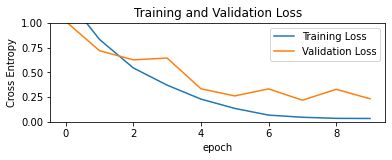

In [54]:
from keras.models import load_model

#CLASSES = ['TOMATOES', 'ONIONS']


In [55]:

# Define the video stream
cap = cv2.VideoCapture(0)  # Change only if you have more than one webcams

# What model to download.
# Models can bee found here: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
MODEL_NAME = 'ssd_inception_v2_coco_2017_11_17/update'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(MODEL_NAME, 'mscoco_label_map.pbtxt')

# Number of classes to detect
NUM_CLASSES = 3

# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


In [57]:


# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts 
#`5`, we know that this corresponds to `airplane`.  Here we use internal utility functions,
#but anything that returns a dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)




In [59]:
#Detection
with detection_graph.as_default():
    with tf.compat.v1.Session(graph=detection_graph) as sess:
        
        while True:
            # Read frame from camera
            ret, image_np = cap.read()
            
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Extract image tensor
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Extract detection boxes
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Extract detection scores
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            # Extract detection classes
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            # Extract number of detectionsd
            num_detections = detection_graph.get_tensor_by_name(
                'num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)

    
            # Display output
            img = cv2.resize(image_np, (800, 600))
            cv2.imshow('object detection', img)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break